# 0. Übungsblatt (Python Grundlagen)
## 1. Aufgabe (Bedingungen und If-Anweisungen)
Implementieren Sie eine Funktion $\texttt{schaltjahr}(j)$ mit $j ∈ \mathbb{N}$ , die berechnet ob ein Jahr $j$ ein Schaltjahr ist. Dabei gelten folgende Regeln:

$$
\texttt{schaltjahr}(j) := \begin{cases} 
                              ``\text{Schaltjahr"} \ \ \ \ \ \ & \text{wenn $j$ durch $400$ teilbar ist.} \\[3pt]
                              ``\text{kein Schaltjahr"} & \text{wenn $j$ durch $100$ teilbar ist.} \\[3pt]
                              ``\text{Schaltjahr"} & \text{wenn $j$ durch $4$ teilbar ist.} \\[3pt]
                              ``\text{kein Schaltjahr"} & \text{sonst} \\
\end{cases}
$$

In [53]:
def ist_schaltjahr(jahr):
    if jahr%400 == 0:
        return True
    if jahr%100 == 0:
        return False
    if jahr%4==0:
        return True
    return False

# Test mit assertions:
assert(not ist_schaltjahr(1900))
assert(ist_schaltjahr(2000))
assert(ist_schaltjahr(2020))
assert(not ist_schaltjahr(2021))

## 2. Aufgabe (arithmetische Operatoren, Listen und Schleifen)
Schreiben Sie eine Funktion $\texttt{mse}(y,\hat{y})$ die zwei Listen $y$ und $\hat{y}$ der Längen $n$ nimmt und den Mean Squared Error (MSE) von $y$ und $\hat{y}$ berechnet. Der MSE ist deﬁniert als:

$$
\texttt{mse}(y,\hat{y}) := \frac{1}{n} \sum\limits_{i = 1}^{n} \big( y - \hat{y} \big)^2
$$

Testen Sie Ihre Methode mit den Listen:

$$
\begin{matrix}
y & \! \! \! \!  = [5, & -1, & 2, & -9, & -7, & 0, & -4, & 3] \\
\hat{y} &\! \! \! \!  = [2, & 6, & -1, & -4, & 3, & 8, & 6, & 1]
\end{matrix}
$$

Der MSE zwischen diesen beiden Listen ist $45$.

In [54]:
def mse(y, y_hat):
    sum = 0
    for i in range(len(y)):
        sum += (y[i]-y_hat[i])*(y[i]-y_hat[i])
    return sum/len(y)

y = [5, -1, 2, -9, -7, 0, -4, 3]
y_hat = [2, 6, -1, -4, 3, 8, 6, 1]
erg = mse(y, y_hat)
print("mse(y, y_hat) =", erg)

mse(y, y_hat) = 45.0


## 3. Aufgabe (Matrizen und Vektoren mit numpy)
Es sei:

$A := \begin{pmatrix}
	-7 & 8 & 6 \\
	9 & -5 & 4 \\
  -1 & -8 & -3 \\
  7 & 5 & 1 \\
\end{pmatrix} \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \  x := \begin{pmatrix}
	-5 \\
	1 \\
  -3 \\
  2 \\
\end{pmatrix}  \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \  p := \begin{pmatrix}
	2 \\
  -9 \\
  -3 \\
\end{pmatrix}$

Verwenden Sie das numpy-Package um folgendes zu berechnen:

$$\Big( A^T x \Big) \, \odot \, p$$

Dabei steht $\odot$ für das elementweise Produkt. Wenn Sie A, x und p als Arrays definieren, könnten folgende Methoden nützlich sein:

* [numpy.matmul(x1, x2)](https://numpy.org/doc/1.19/reference/generated/numpy.matmul.html?highlight=matmul#numpy.matmul)
* [numpy.reshape(a, newshape)](https://numpy.org/doc/1.19/reference/generated/numpy.reshape.html?highlight=reshape#numpy.reshape)
* [numpy.transpose()](https://numpy.org/doc/1.19/reference/generated/numpy.transpose.html?highlight=transpose#numpy.transpose)

In [55]:
import numpy as np
A = [[-7, 8, 6],
     [9, -5, 4],
     [-1, -8, -3],
     [7, 5, 1]]
x = [[-5],
     [1],
     [-3],
     [2]]
p = [[2],
     [-9],
     [-3]]

B = np.transpose(A)
C = np.matmul(B,x)
D = C*p
print(C)
print(D)

[[ 61]
 [-11]
 [-15]]
[[122]
 [ 99]
 [ 45]]


## 4. Klassen (OOP, Tiefen- und Breitensuche)
Implementieren Sie eine Klasse `Node`, dessen Konstruktor mindestens die folgenden beiden Parameter entgegen nimmt:

*   id $\leadsto$ eindeutige ganze Zahl.
*   children $\leadsto$ Liste von `Node` Objekten.

Gehen Sie davon aus, dass mit dem `Node` Objekt später nur Bäume erstellt werden, d.h. es wird keine Kreise geben.

## 4.1. Tiefensuche und Breitensuche
Implementieren Sie in der `Node`-Klasse die Methoden:
*   `dfs(target_id)`  $\leadsto$ führt eine Tiefensuche aus (startend im aktuellen Knotenobjekt) und sucht nach dem Knoten mit id `target_id`
*   `bfs(target_id)`$\leadsto$ führt eine Breitensuche aus (startend im aktuellen Knotenobjekt) und sucht nach dem Knoten mit id `target_id`

Für die Breitensuche könnte das Modul `collections` mit der Klasse `deque` sinnvoll sein. Hierfür sind die folgenden Methoden sinnvoll:



*   Erstellen einer neuen, leeren Queue: `my_queue = deque()`
*   Die Zahl 3 hinten an die Queue anhängen: `my_queue.appendleft(3)`
*   Das nächste Element aus der Queue nehmen: `next_item = my_queue.pop()`
*   Fragen ob die Queue leer ist: `if my_queue:`

Beim Einfügen eines Elementes ist Vorsicht geboten. Es gibt auch die Methode `my_queue.append(3)`. Hiermit hängen Sie das Element 3 rechts (und somit vorne) an die Queue an. Weitere Infromationen finden Sie in der [deque Docu](https://docs.python.org/3/library/collections.html#collections.deque).


In [56]:
from collections import deque

class Node:
    def __init__(self, id, children):
        self.id = id
        self.children = children

    def dfs(self, target_id):
        if self.id == target_id:
                return True
        if self.children == []:
            return False
        for child in self.children:
            if child.dfs(target_id):
                return True
        return False

    def bfs(self, target_id):
        q = deque()
        def worker(node, target_id):
            if node.id == target_id:
                    return True
            for i in node.children:
                q.appendleft(i)
            if not q:
                return False
            return worker(q.pop(), target_id)
        return worker(self, target_id)


def tree_1():
    k5 = Node(5, [])
    k4 = Node(4, [])
    k3 = Node(3, [])
    k2 = Node(2, [k4, k5])
    k1 = Node(1, [k2, k3])

    return k1


def tree_2():
    k5 = Node(5, [])
    k4 = Node(4, [])
    k3 = Node(3, [])
    k2 = Node(2, [k4, k5])
    k1 = Node(1, [k2, k2, k3, k2])

    return k1

def tree_3():
    k5 = Node(5, [])
    k4 = Node(4, [])
    k3 = Node(3, [])
    k2 = Node(2, [k4, k5, k3])
    k1 = Node(1, [k2, k2])

    return k1

dfs_tree = tree_3()
bfs_tree = tree_3()
print("root.dfs(3) =", dfs_tree.dfs(3))
print("root.bfs(3) =", bfs_tree.bfs(3))

root.dfs(3) = True
root.bfs(3) = True


## 4.2. Heapsort
Als nächstes betrachten wir eine bekannte Min-Heap Implementierung in Python. Dazu nutzen wir das Modul `heapq`. Die wichtigsten Methoden davon sind:

*   Konvertieren einer Liste `min_heap` zu einem Min-Heap: `heapq.heapify(min_heap)`
*   Die Zahl 3 in den Min-Heap einfügen: `heapq.heappush(min_heap, 3)`
*   Das kleinste Element aus dem Min-Heap lesen und entfernen: `next_min_elem = heapq.heappop(data)`
*   Fragen ob der Min-Heap leer ist: `if min_heap:`

Verwenden Sie das `heapq` Modul um die unsortierte Liste `data` mit Hilfe des Heapsort-Algorithmuses zu sortieren.

In [57]:
# data = np.random.randint(0, 20, 10)
data = [1, 18,  5, 13,  4, 10, 19, 16, 10, 15]

import heapq
A = []
heapq.heapify(data)
while data:
    A.append(heapq.heappop(data))
print(A)

[1, 4, 5, 10, 10, 13, 15, 16, 18, 19]


## 5. Daten laden
Zusätzlich zu diesem Notebook finden Sie in OLAT und auf dem Jupyterhub eine Datei `Ex_0.txt`. Wenn Sie mit dem Jupyterhub arbeiten, finden Sie die Datei unter:
`/home/share/Ex_0.txt`
Sie können die `loadtxt` Methode von `numpy` verwenden um die Datei zu lesen und als Array zu speichern. Dazu schreiben Sie einfach:

`data = np.loadtxt("/home/share/Ex_0.txt")`

In [58]:
import os
import numpy as np
path = os.getcwd() + os.sep + "Ex_0.csv"
data = np.loadtxt(path, delimiter=',')
print("data.shape =", data.shape)
print("Anzahl Zeilen =", data.shape[0])
print("Anzahl Spalten =", data.shape[1])

data.shape = (1000, 3)
Anzahl Zeilen = 1000
Anzahl Spalten = 3


## 6. Visualisieren von Daten
In diesem letzten Abschnitt möchten wir die zuvor gelesene Daten visualisieren. Hierfür verwenden wir das Package `matplotlib`. Die Datei besteht aus 1000 Zeilen und 3 Spalten. Jede Zeile korrespondiert zu genau einem Punkt. Die erste Spalte beschreibt den x-Wert $x_i$, die zweite Spalte den y-Wert $y_i$ mit $i \in \{0,1, \ldots, 999\}$. Die dritte Spalte enthält einen Vergleichswert $v_i$.
 <br>  <br>

### 6.1 Einfache Scatter Plots
In dieser Teilaufgabe verwenden wir lediglich die erste und zweite Spalte und plotten alle Punkte mit Hilfe der `scatter` Methode.


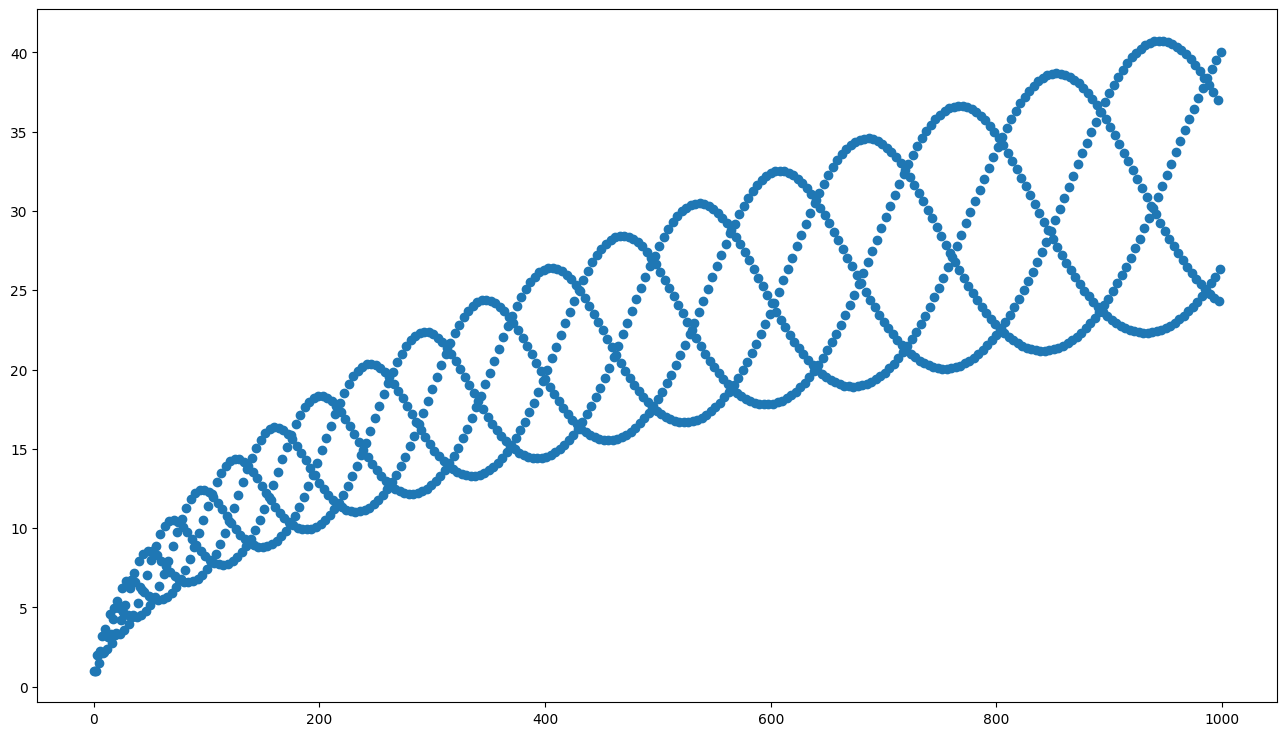

In [59]:
import matplotlib.pyplot as plt   # Laden des Packages und den Alias plt vergeben.
plt.rcParams['figure.figsize'] = [16, 9]
A = np.transpose(data)
plt.scatter(A[0], A[1])

### 6.2 Scatter Plots mit Farben
Jetzt kommt die dritte Spalte ins Spiel. Zeichnen Sie alle Punkte $(x_i, y_i)$ mit $y_i \geq v_i$ orange und alle Punkte für die gilt $y_i < v_i$, zeichnen Sie blau. Sie können auch eigene Farben definieren und verwenden.

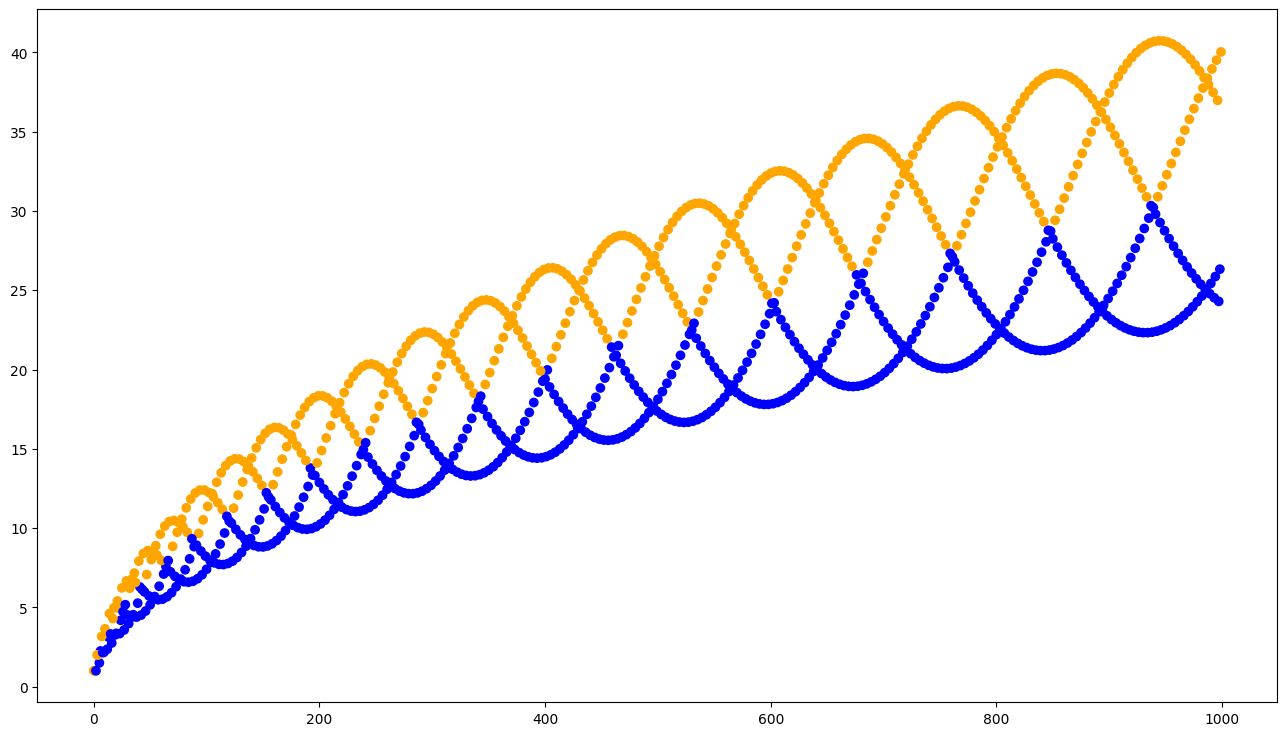

In [60]:
c = []
for i in range(len(A[0])):
    if A[1][i]>= A[2][i]:
        c += ["orange"]
    else: c += ["blue"]
plt.scatter([A[0]],[A[1]], c=c)

### 6.3 Funktionen plotten
Durch die unterschiedliche Färbung ergibt sich eine Trennung zwischen den orangenen und blauen Punkten. Diese Trennung soll nun mit Hilfe der `plot`-Methode als Funktion dargestellt werden.

**Hinweis:** <br>
Die Punkte sind in der Datei nicht sortiert.

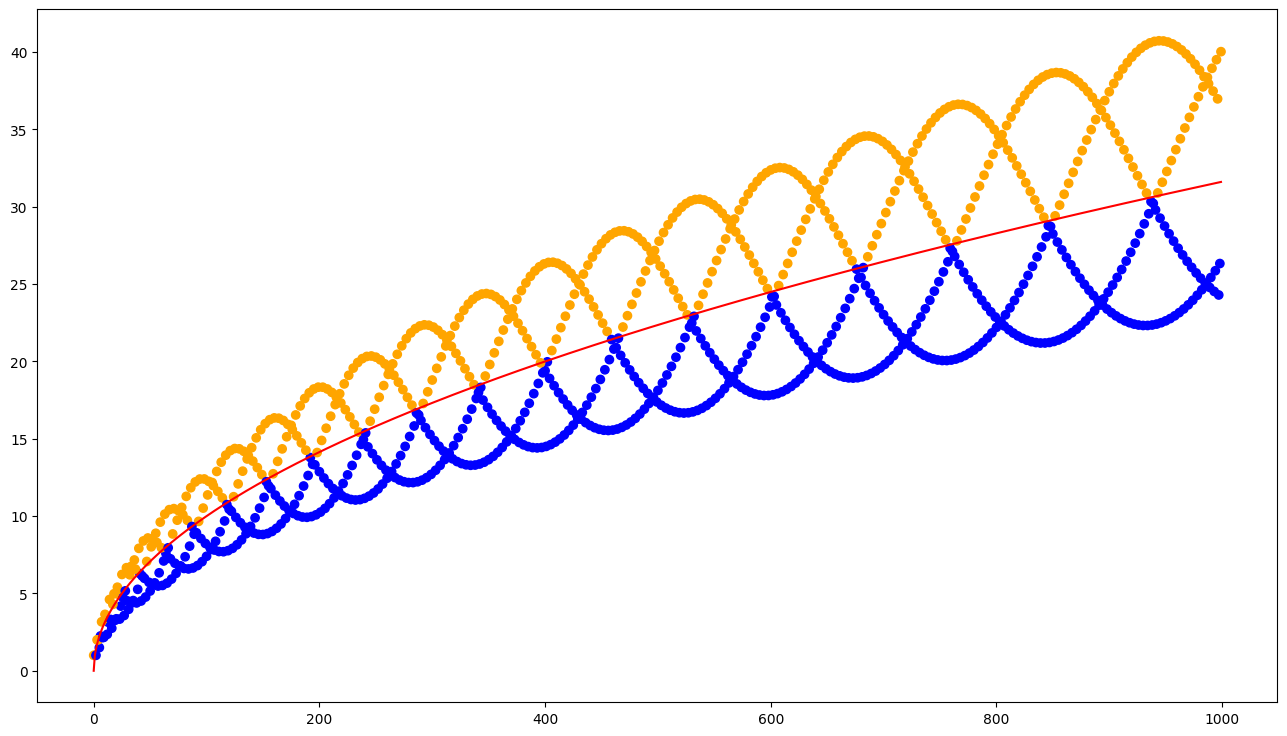

In [61]:
B = A[:, A[2, :].argsort()]
plt.scatter([A[0]],[A[1]], c=c)
plt.plot(B[0], B[2], c = "red")